In [1]:
import numpy as np
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.widgets import Slider, Button

from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import sin
from numpy import e
from numpy import pi
from numpy import absolute

In [2]:
def sphere(x, y):
    return x**2.0 + y**2.0
def wave(x, y):
    return x**3.0 + y**2.0
def Easom(x, y):
    return -cos(x) * cos(y) * exp(-((x - pi)**2 + (y - pi)**2))
def Ackley(x, y):
    return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20
def Himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 -7)**2
def HolderTable(x, y):
    return -absolute(sin(x) * cos(y) * exp(absolute(1 - (sqrt(x**2 + y**2)/pi))))

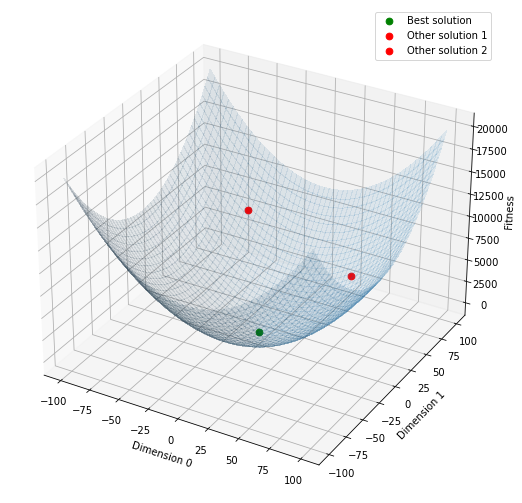

In [22]:
X = np.arange(-100, 100, 0.1)
Y = np.arange(-100, 100, 0.1)
X, Y = np.meshgrid(X, Y)
Z = sphere(X,Y)
fig, ax = plt.subplots(figsize =(14, 9),subplot_kw={"projection": "3d"})
ax.set_xlabel('Dimension 0')
ax.set_ylabel('Dimension 1')
ax.set_zlabel('Fitness')
ax.plot_surface(X, Y, Z, linewidth=0, antialiased=False, alpha=0.1)
ax.scatter([0],[0],[0], label='Best solution', c='green', s=45)
ax.scatter([50],[50],[sphere(50, 50)], label='Other solution 1', c='red', s=45)
ax.scatter([-50],[70],[sphere(-50, 70)], label='Other solution 2', c='red', s=45)

plt.legend()
plt.savefig('../report/images/solution_landscape.png', dpi=300)
plt.show()

In [3]:
con = sqlite3.connect("../database.db")
experiments = pd.read_sql_query("SELECT * from experiments", con)

In [4]:
experiments

,experiment_id,problem_dimension,particles_number,iterations_number,threads_number,processes_number,neighborhood_population,inertia,phi_1,phi_2,init_max_position,init_min_position,init_max_velocity,init_min_velocity,fitness_function,distance_function,fitness_goal
0,1,2,50,50,None,None,50,0.8,0.3,0.3,10.0,-10.0,100.0,-100.0,sphere,euclidean,minimum
1,2,2,50,50,None,None,50,0.8,0.3,0.3,10.0,-10.0,100.0,-100.0,Ackley,euclidean,minimum


In [14]:
selected_experiment = 2
experiment = experiments[experiments.experiment_id == selected_experiment]
iterations_number = experiment.iterations_number.values[0]
fitness_function = experiment.fitness_function.values[0]
if fitness_function =='sphere':
    fitness_function = sphere
elif fitness_function =='wave':
    fitness_function = wave
elif fitness_function =='Easom':
    fitness_function = Easom
elif fitness_function =='Ackley':
    fitness_function = Ackley
elif fitness_function =='Himmelblau':
    fitness_function = Himmelblau
elif fitness_function =='HolderTable':
    fitness_function = HolderTable

In [15]:
df = pd.read_sql_query(f"SELECT * from solutions_experiment_{selected_experiment}", con)

In [16]:
init_iteration = 0
x = df.dim_0.values
y = df.dim_1.values
z = df.fitness.values
c = df.iteration_step

In [17]:
min_pos, max_pos = int(min(x.min(), y.min())), int(max(x.max(), y.max()))

In [18]:
max_pos, min_pos

(40, -63)

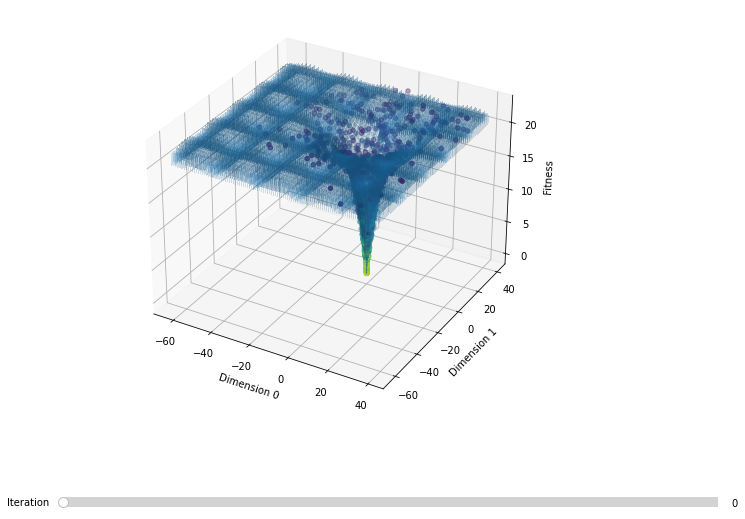

In [19]:
X = np.arange(min_pos, max_pos, 0.1)
Y = np.arange(min_pos, max_pos, 0.1)
X, Y = np.meshgrid(X, Y)
Z = fitness_function(X,Y)
fig, ax = plt.subplots(figsize =(14, 9),subplot_kw={"projection": "3d"})
ax.set_xlabel('Dimension 0')
ax.set_ylabel('Dimension 1')
ax.set_zlabel('Fitness')
ax.plot_surface(X, Y, Z, linewidth=0, antialiased=False, alpha=0.2)
fig.subplots_adjust(bottom=0.25)

ax_iteration = fig.add_axes([0.25, 0.1, 0.65, 0.03])
iteration_slider = Slider(
    ax=ax_iteration,
    label='Iteration',
    valmin=min(c),
    valmax=max(c),
    valinit=init_iteration,
)
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()
iteration_slider.on_changed(update)

 
ax.scatter(x,y,z, c=c)
plt.show()

In [43]:
!mkdir -p gif
!rm -r gif/*

In [44]:
for i in range(1, iterations_number + 1):
    X = np.arange(min_pos, max_pos, 0.1)
    Y = np.arange(min_pos, max_pos, 0.1)
    X, Y = np.meshgrid(X, Y)
    Z = fitness_function(X,Y)
    fig, ax = plt.subplots(figsize =(14, 9),subplot_kw={"projection": "3d"})
    ax.set_xlabel('Dimension 0')
    ax.set_ylabel('Dimension 1')
    ax.set_zlabel('Fitness')
    ax.set_title(f"Iteartion {i}")
    ax.plot_surface(X, Y, Z, linewidth=0, antialiased=False, alpha=0.1)

    x = df[df.iteration_step == i].dim_0.values
    y = df[df.iteration_step == i].dim_1.values
    z = df[df.iteration_step == i].fitness.values
    ax.scatter(x,y,z)
    plt.savefig(f'./gif/frame-{i:05}.png')
    plt.close()

In [45]:
!generate_gif_from_frames.sh

ffmpeg version 4.4.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11.3.0 (GCC)
  configuration: --disable-static --prefix=/nix/store/dxbf9sp7n655nsdf3zqinmv6lprnl679-ffmpeg-4.4.2 --arch=x86_64 --target_os=linux --enable-gpl --enable-version3 --enable-shared --enable-pic --enable-libsrt --enable-runtime-cpudetect --enable-hardcoded-tables --enable-pthreads --disable-w32threads --disable-os2threads --enable-network --enable-pixelutils --enable-ffmpeg --disable-ffplay --enable-ffprobe --enable-avcodec --enable-avdevice --enable-avfilter --enable-avformat --enable-avresample --enable-avutil --enable-postproc --enable-swresample --enable-swscale --disable-doc --enable-libass --enable-bzlib --enable-gnutls --enable-fontconfig --enable-libfreetype --enable-libmp3lame --enable-iconv --enable-libtheora --enable-libssh --enable-vaapi --enable-libdrm --enable-vdpau --enable-libvorbis --enable-libvpx --enable-lzma --disable-opengl --disable-libmfx --disable-libaom --enable-libpul